<b> Practice Notebook based on ML Workflow </b>

Exercise link : https://www.learnpytorch.io/01_pytorch_workflow/

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu118'

In [3]:
weight = 0.5
bias = 0.1

X = torch.arange(0.1 , 1 , 0.02)
y = (X * weight) + bias

In [4]:
X

tensor([0.1000, 0.1200, 0.1400, 0.1600, 0.1800, 0.2000, 0.2200, 0.2400, 0.2600,
        0.2800, 0.3000, 0.3200, 0.3400, 0.3600, 0.3800, 0.4000, 0.4200, 0.4400,
        0.4600, 0.4800, 0.5000, 0.5200, 0.5400, 0.5600, 0.5800, 0.6000, 0.6200,
        0.6400, 0.6600, 0.6800, 0.7000, 0.7200, 0.7400, 0.7600, 0.7800, 0.8000,
        0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [5]:
y

tensor([0.1500, 0.1600, 0.1700, 0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300,
        0.2400, 0.2500, 0.2600, 0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200,
        0.3300, 0.3400, 0.3500, 0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100,
        0.4200, 0.4300, 0.4400, 0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000,
        0.5100, 0.5200, 0.5300, 0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900])

In [6]:
train_split = int(0.8*len(X))

In [7]:
X_train , y_train   = X[:train_split] , y[:train_split]
X_test , y_test =  X[train_split:] , y[train_split:]

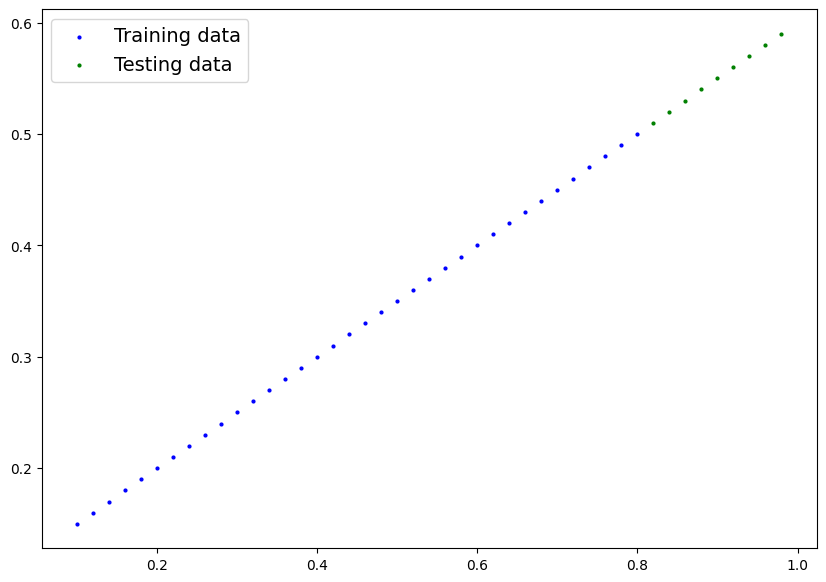

In [8]:
import plot_predictions

plot_predictions.plot_data(X_train , y_train , X_test , y_test)

In [45]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        # these are default definations
        self.weight = nn.Parameter(torch.tensor(0.9623 , requires_grad=True , dtype=torch.float64))
        self.bias = nn.Parameter(torch.tensor(-0.8253 , requires_grad=True , dtype=torch.float64))

        #  # using nn.Linear() for creating model parameters
        # self.linear_layer = nn.Linear(in_features=1 , out_features=1)
       
    def forward(self , X : torch.tensor)-> torch.tensor :
        # self.linear_layer = nn.Linear(in_features=len(X) , out_features=len(X))
        # return self.linear_layer(X)

        return self.bias + (self.weight * X)

In [46]:
model = LinearRegression()

In [47]:
model.state_dict()

OrderedDict([('weight', tensor(0.9623, dtype=torch.float64)),
             ('bias', tensor(-0.8253, dtype=torch.float64))])

In [48]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

In [84]:
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
    #Traning
    model.train()

    pred = model(X_train)

    loss = loss_fn(pred , y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred , y_test)

    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss}  | Test_Loss : {test_loss}")

Epoch : 0 | Loss : 0.00034257894731126726  | Test_Loss : 0.0008128086919896305
Epoch : 10 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 20 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 30 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 40 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 50 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 60 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 70 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 80 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 90 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 100 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 110 | Loss : 0.00035818127798847854  | Test_Loss : 0.0014607972698286176
Epoch : 120 | Loss : 0.0003581812779884

In [86]:
model.state_dict()

OrderedDict([('weight', tensor(0.5009, dtype=torch.float64)),
             ('bias', tensor(0.0992, dtype=torch.float64))])

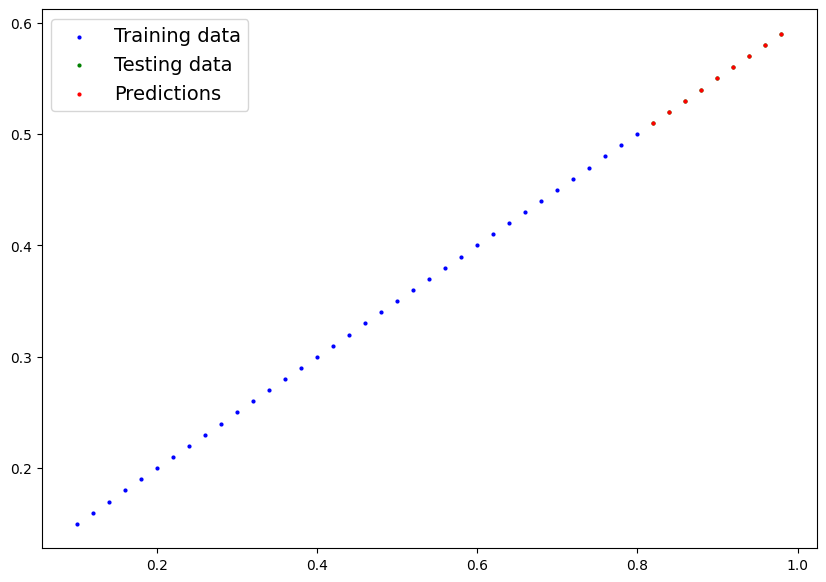

In [85]:
with torch.inference_mode():
    preds = model(X_test)

plot_predictions.plot_data(X_train , y_train , X_test , y_test , preds)

In [89]:
from pathlib import Path

# Creating model path directory..
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# Creating a model save path
MODEL_NAME = "01_Linear_Regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model 
torch.save(obj=model , f=MODEL_SAVE_PATH)